In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
iris_data=pd.read_csv('F:\Intern TSF\iris.csv')

In [3]:
##top 5 rows
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#check for null values
(round(iris_data.isnull().sum()*100)/(iris_data.shape[0]),2)

(Id               0.0
 SepalLengthCm    0.0
 SepalWidthCm     0.0
 PetalLengthCm    0.0
 PetalWidthCm     0.0
 Species          0.0
 dtype: float64,
 2)

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


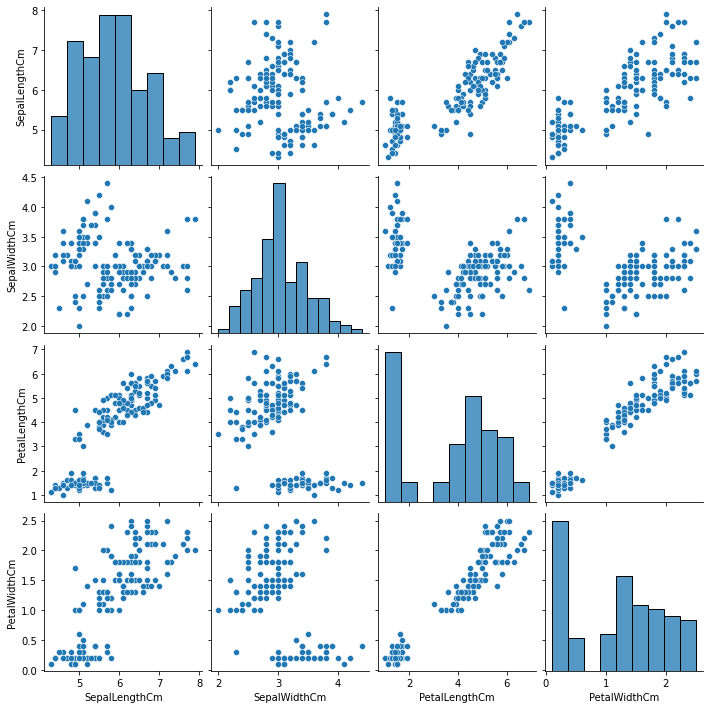

In [10]:
## Data visulaization
sns.pairplotpl

<AxesSubplot:>

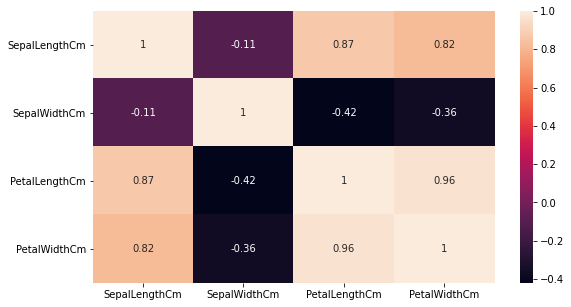

In [12]:
plt.figure(figsize=(9,5))
sns.heatmap(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr(),annot=True)

In [15]:
iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### lets check whether the data is feasible for clustering or not

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

0.8633418321417543

- given data is feasible for clustering 

## Model bulding

In [16]:
from sklearn.cluster import KMeans

In [17]:
km1=KMeans(n_clusters=3,max_iter=50,random_state=42)
km1.fit(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

KMeans(max_iter=50, n_clusters=3)

In [18]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## finding optimal number of clusters using elbow method

In [26]:
ssd=[]
clusters=[2,3,4,5,6,7]
for cluster in clusters:
    km2=KMeans(n_clusters=cluster,max_iter=50)
    km2.fit(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    ssd.append(km2.inertia_)

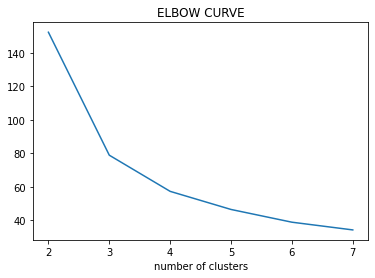

In [32]:
plt.title('ELBOW CURVE')
plt.xlabel('number of clusters')
plt.plot(clusters,ssd)

In [29]:
from sklearn.metrics import silhouette_score

## silhouette analysis

In [30]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=42)
    kmeans.fit(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6808136202936815
For n_clusters=3, the silhouette score is 0.5525919445499755
For n_clusters=4, the silhouette score is 0.49782569010954686
For n_clusters=5, the silhouette score is 0.49285559183161176
For n_clusters=6, the silhouette score is 0.3665040150235963
For n_clusters=7, the silhouette score is 0.3580475792925567
For n_clusters=8, the silhouette score is 0.34219104415019447


### Final Model with 3 clusters

In [37]:
km3=KMeans(n_clusters=3,max_iter=50,random_state=42)
km3.fit(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [38]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [41]:
##concatinating cluster_id in original data
iris_data['cluster_id']=km3.labels_

In [42]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [47]:
iris_data['cluster_id'].value_counts()

0    62
1    50
2    38
Name: cluster_id, dtype: int64

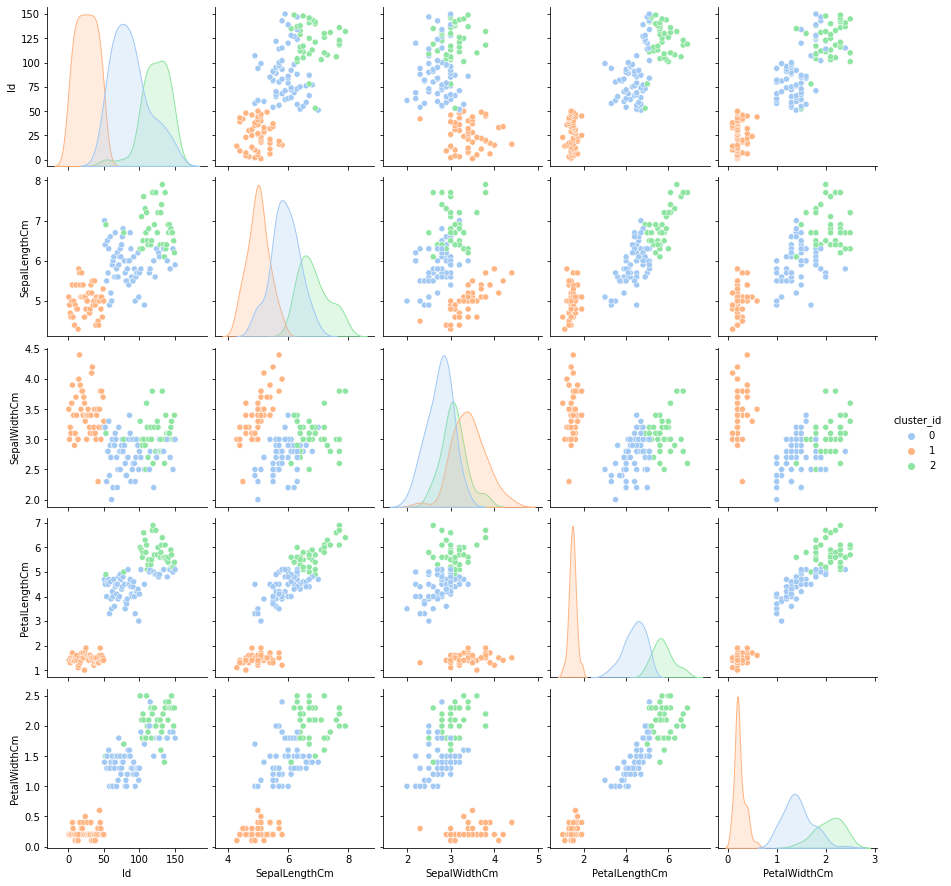

In [52]:

sns.pairplot(iris_data,hue='cluster_id',palette="pastel")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster_id', ylabel='count'>

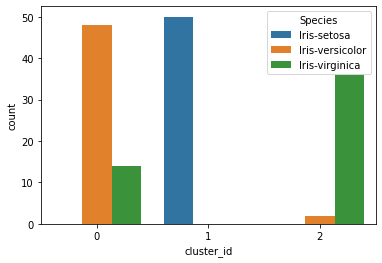

In [62]:
sns.countplot(iris_data['cluster_id'],hue=iris_data['Species'])